In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('C:\\Users\\fhrt8\\Downloads\\MHEnterprises.csv')
df.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [5]:
# Searching for null values in the dataset
df.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [7]:
# Searching for duplicate values in the dataset
df[df.duplicated()]
# No duplicate value

,customer_id,channel,cost,conversion_rate,revenue


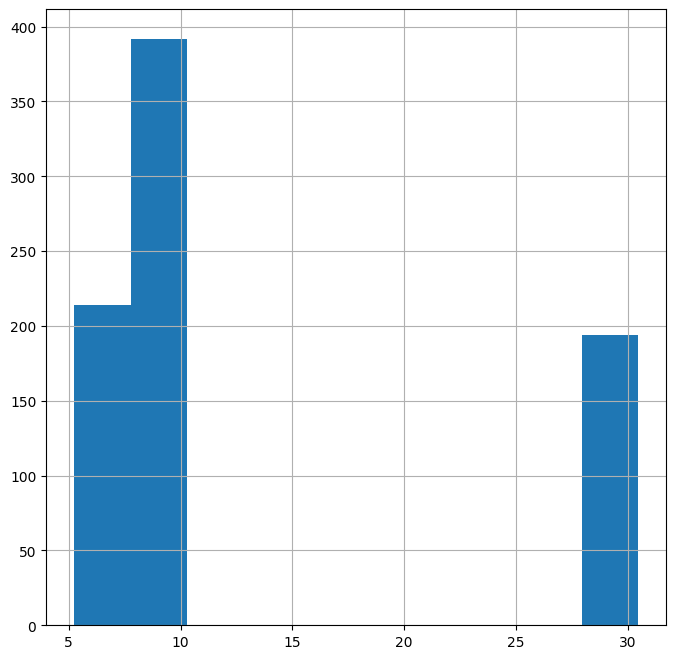

In [14]:
# Distribution of Aquisition Cost
df['cost'].hist(figsize=(8,8),bins=10)
plt.show()

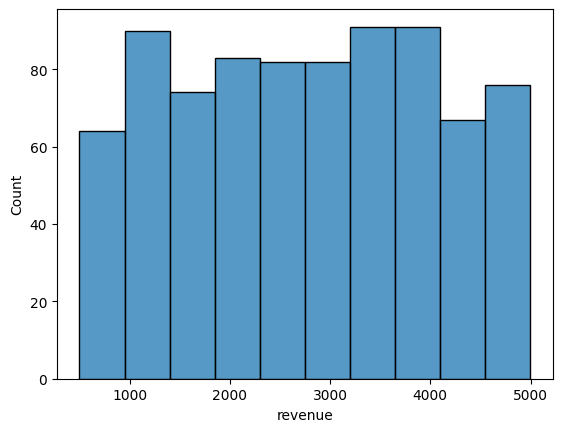

In [20]:
# Distribution of revenue
sns.histplot(data=df, x=df['revenue'],bins=10)
plt.show()

In [22]:
# Compare the cost of acquisition across different channels and identify the most and least profitable channels
cost_by_channel = df.groupby('channel')['cost'].mean().reset_index()
cost_by_channel

,channel,cost
0,email marketing,5.246263
1,paid advertising,30.450327
2,referral,8.320327
3,social media,9.546326


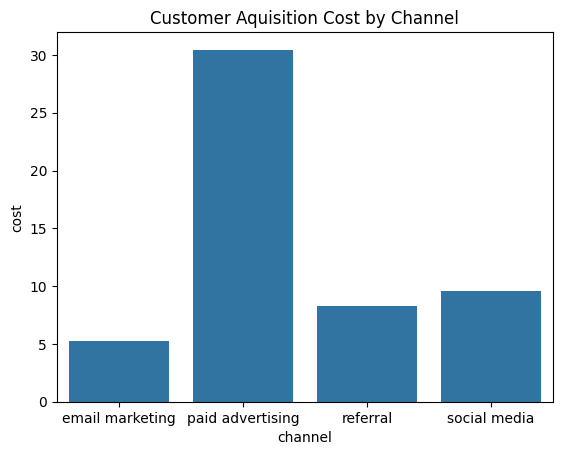

In [23]:
# Customer Aquisition Cost by Channel
sns.barplot(data=cost_by_channel, x=cost_by_channel['channel'], y=cost_by_channel['cost'])
plt.title('Customer Aquisition Cost by Channel')
plt.show()

In [24]:
# Find conversion by channel 
conversion_by_channel= df.groupby('channel')['conversion_rate'].mean().reset_index()
conversion_by_channel

,channel,conversion_rate
0,email marketing,0.043822
1,paid advertising,0.016341
2,referral,0.123145
3,social media,0.167592


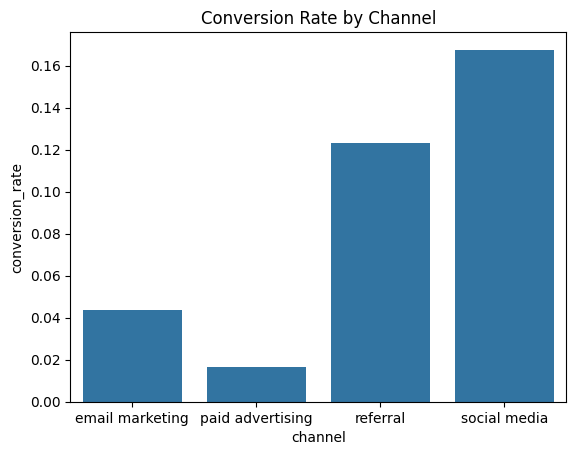

In [25]:
sns.barplot(data=conversion_by_channel, x=conversion_by_channel['channel'], y=conversion_by_channel['conversion_rate'],)
plt.title('Conversion Rate by Channel')
plt.show()

In [26]:
# Find Revenue By Channel
revenue_by_channel = df.groupby('channel')['revenue'].sum().reset_index()
revenue_by_channel

,channel,revenue
0,email marketing,604706
1,paid advertising,548396
2,referral,569552
3,social media,492667


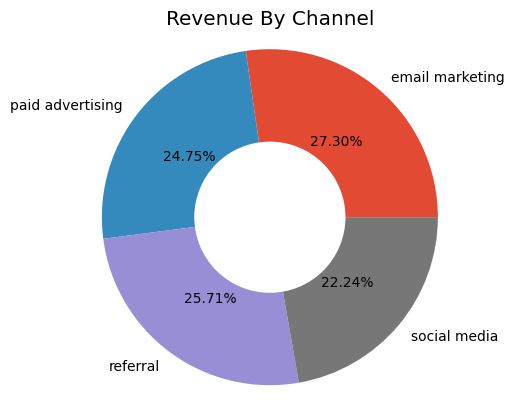

In [36]:
# Doughnut plot of Revenue by channel
plt.style.use('ggplot')
plt.title('Revenue By Channel')
plt.pie(x=revenue_by_channel['revenue'],labels=revenue_by_channel['channel'],autopct='%.2f%%')
plt.axis('equal')
circle=plt.Circle(xy=(0,0),radius=0.45,facecolor='white')
plt.gca().add_artist(circle)
plt.show()

In [37]:
# Calculate the return on investment (ROI) for each channel
df['roi']=df['revenue'] / df['cost']
roi_by_channel = df.groupby('channel')['roi'].mean().reset_index()
roi_by_channel

,channel,roi
0,email marketing,538.617455
1,paid advertising,92.832615
2,referral,330.691213
3,social media,278.962290


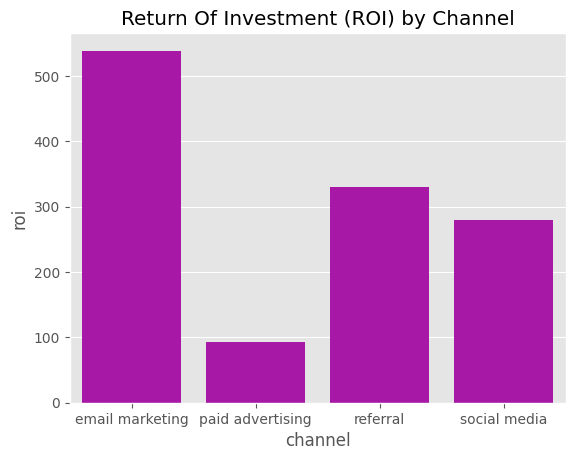

In [43]:
sns.barplot(data=roi_by_channel,x=roi_by_channel['channel'],y=roi_by_channel['roi'],color='m')
plt.title('Return Of Investment (ROI) by Channel')
plt.show()

In [44]:
# Customer Lifetime Value by Channel
df['cltv'] = (df['revenue'] - df['cost']) * df['conversion_rate'] / df['cost']
channel_cltv = df.groupby('channel')['cltv'].mean().reset_index()
channel_cltv

,channel,cltv
0,email marketing,23.559595
1,paid advertising,1.500682
2,referral,40.599817
3,social media,46.584325


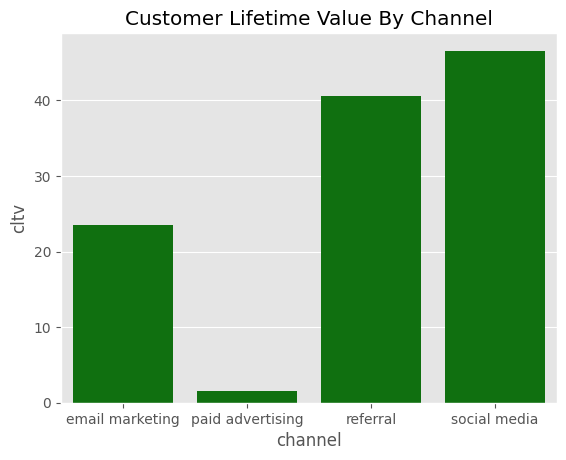

In [48]:
sns.barplot(data=channel_cltv,x=channel_cltv['channel'],y=channel_cltv['cltv'],color='g')
plt.title('Customer Lifetime Value By Channel')
plt.show()

In [50]:
# compare the CLTV distributions of the social media and referral channels
subset = df.loc[df['channel'].isin(['social media', 'referral'])]
subset.head()

,customer_id,channel,cost,conversion_rate,revenue,roi,cltv
0,1,referral,8.320327,0.123145,4199,504.667681,62.024146
3,4,social media,9.546326,0.167592,1520,159.223564,26.517043
4,5,referral,8.320327,0.123145,2419,290.733775,35.679260
6,7,social media,9.546326,0.167592,1172,122.769748,20.407666
8,9,social media,9.546326,0.167592,2137,223.855761,37.348898


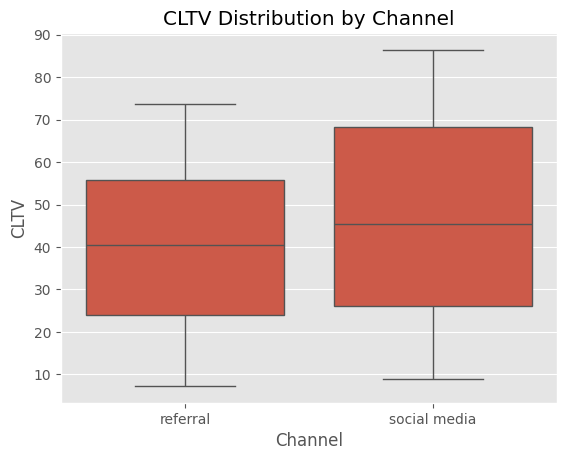

In [52]:
sns.boxplot(data=subset,x=subset['channel'],y=subset['cltv'])
plt.title('CLTV Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('CLTV')
plt.show()